# Importing neccessary libraries and dataset

In [1]:
!pip install contractions
!pip install autocorrect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 13.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=9640bc159865fedc3531bdf628e4da3c36f51d9438a4fb5402b3fbb2cf6ba366
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [2]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings

#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
from sklearn import preprocessing

In [3]:
import numpy as np
import pandas as pd

url="https://raw.githubusercontent.com/AvantikaJalote/Final-Year-Project/main/cyberbullying_tweets_changes.csv"
df=pd.read_csv(url)
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


**There is not much imbalance between different cyberbulling type. other_cyberbulling will be removed since it may cause a confusion for the models with other cyberbullying class.**

In [4]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
cyberbullying        39749
not_cyberbullying    13496
Name: count, dtype: int64

# Dataset Preprocessing

In [5]:
# Renaming Categories
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [6]:
# Checking 10 samples
df.sample(10)

,text,sentiment
49454,"HAHAHA! Best quote in a long time. ""I'm gonna ...",not_cyberbullying
4724,@cigardubey right now? multiple browsers :P ...,not_cyberbullying
50924,fuck you I miss the island,not_cyberbullying
41314,Some scam psychic site gave me a free trial tw...,cyberbullying
4110,#Bullying Subscribe to my free self-defense bu...,not_cyberbullying
23817,This idiot won’t even let schools teach Christ...,cyberbullying
11485,@Suppose_Not @DoeringNorman @JustLaurenB Good ...,cyberbullying
41483,Ty Cobb and many other white ball players call...,cyberbullying
39793,@EmmaHxlmes nigger u dumb as fuck thats not me...,cyberbullying
787,There's a cave nearby where Colin keeps his st...,not_cyberbullying


**Converting categories into numbers**

In [7]:
df["sentiment"].replace({"not_cyberbullying": 0, "cyberbullying": 1}, inplace=True)

/tmp/ipykernel_33/217867185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sentiment"].replace({"not_cyberbullying": 0, "cyberbullying": 1}, inplace=True)
/tmp/ipykernel_33/217867185.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"].replace({"not_cyberbullying": 0, "cyberb

In [8]:
sentiments = ["cyberbullying","not bullying"]

In [9]:
#Text cleaning
import re, string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def strip_emoji(text):
    return emoji.replace_emoji(text, "")

# Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower()  # remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # remove links and mentions
    text = re.sub(r'[^\x00-\x7f]', r'', text)  # remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    words = [word for word in text.split() if len(word) < 14]  # remove words longer than 14 characters
    return ' '.join(words)

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [10]:
texts_cleaned = []
for t in df.text:
    texts_cleaned.append(preprocess(t))

In [11]:
df['text_clean'] = texts_cleaned

**Clean text**

In [12]:
df.head()

,text,sentiment,text_clean
0,"In other words #katandandre, your food was cra...",0,in other word katandandr your food wa crapilic...
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,whi is aussietv so white mkr theblock today su...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,a classi whore or more red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh p thank for the head up but not too concer...
4,@RudhoeEnglish This is an ISIS account pretend...,0,thi is an isi account pretend to be a kurdish ...


**Checking tweet duplicates**

In [13]:
df["text_clean"].duplicated().sum()

2820

In [14]:
df.drop_duplicates("text_clean", inplace=True)

In [15]:
df.sentiment.value_counts()

sentiment
1    37223
0    13202
Name: count, dtype: int64

**Checking tweet length**

In [16]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [17]:
df['text_len'] = text_len

In [18]:
# checking long tweets
df.sort_values(by=['text_len'], ascending=False)

,text,sentiment,text_clean,text_len
29205,is feminazi an actual word with a denot…\n@Nas...,1,is feminazi an actual word with a denot my job...,745
24516,@NICKIMINAJ: #WutKinda\nAt this rate the MKR f...,1,wutkinda at thi rate the mkr final will be in ...,662
30752,I don't retreat.\nyessssssss http://t.co/Td90k...,1,i do not retreat yessssssss uh whi do they not...,480
52919,So I say goodbye to a town that has ears and...,0,so i say goodby to a town that ha ear and eye ...,362
44035,You so black and white trying to live like a n...,1,you so black and white tri to live like a nigg...,319
...,...,...,...,...
31423,@dylanw random.,1,random,1
2448,@haniff_azman yes.,0,ye,1
28843,@mummey omfg,1,omfg,1
51932,Jet.,0,jet,1


In [19]:
df = df[df['text_len'] > 3]
df = df[df['text_len'] < 100]

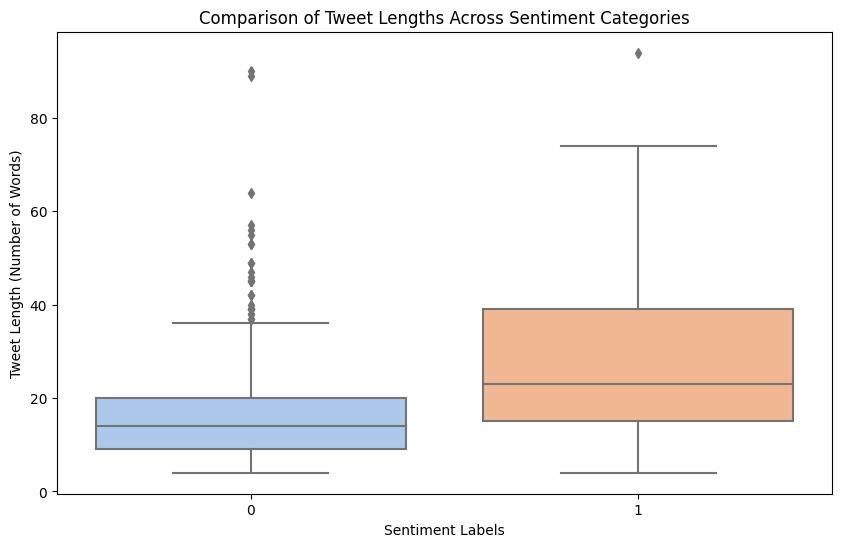

In [20]:
# Box plot for comparing tweet lengths across different sentiment categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y=df['text_clean'].apply(lambda x: len(x.split())), data=df, palette='pastel')
plt.title('Comparison of Tweet Lengths Across Sentiment Categories')
plt.xlabel('Sentiment Labels')
plt.ylabel('Tweet Length (Number of Words)')
plt.show()

In [21]:
df

,text,sentiment,text_clean,text_len
0,"In other words #katandandre, your food was cra...",0,in other word katandandr your food wa crapilic...,9
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,whi is aussietv so white mkr theblock today su...,13
2,@XochitlSuckkks a classy whore? Or more red ve...,0,a classi whore or more red velvet cupcak,8
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh p thank for the head up but not too concer...,17
4,@RudhoeEnglish This is an ISIS account pretend...,0,thi is an isi account pretend to be a kurdish ...,17
...,...,...,...,...
53234,encore! encore! suree hahaha,0,encor encor sure hahaha,4
53237,thumbs up!r i just realize our sig pic is thu...,0,thumb upr i just realiz our sig pic is thumb u...,15
53240,Umm made love to my boyfriend. :] r hahah,0,umm made love to my boyfriend r hahah,8
53242,Is there ever a day that mattresses are not o...,0,is there ever a day that mattress are not on sale,11


**Wordcloud**

Overall Sentiment Word Cloud:


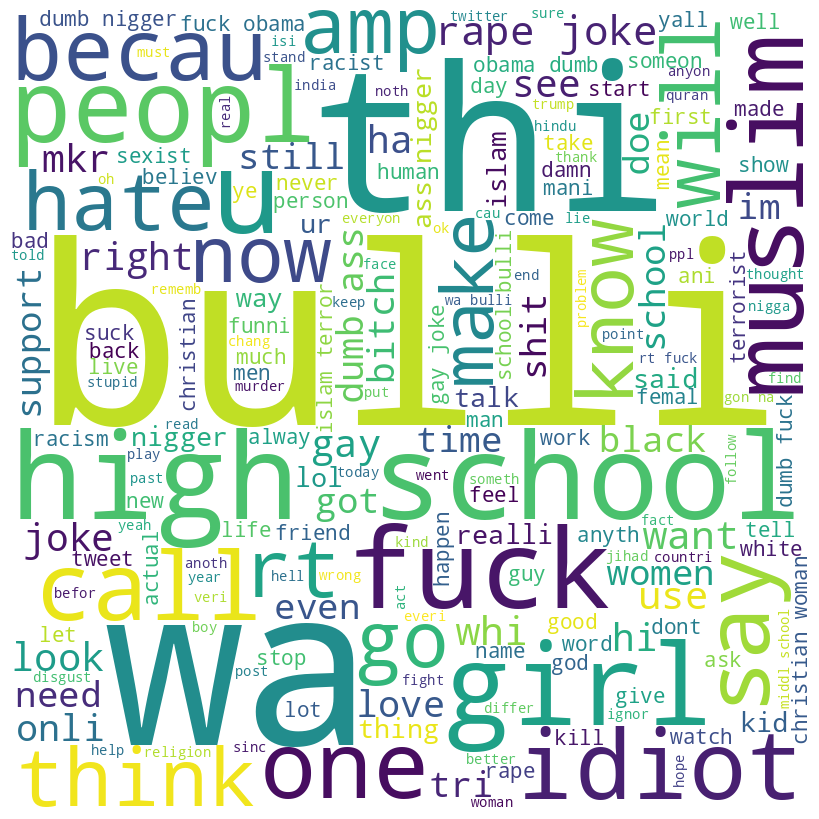


Word Cloud for not_cyberbullying :


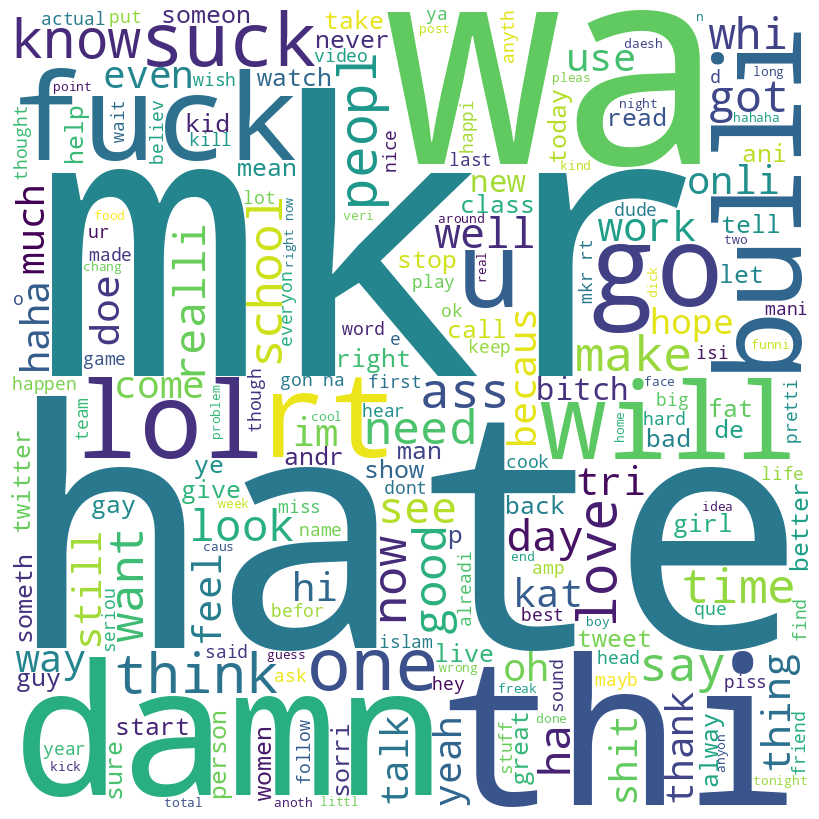


Word Cloud for cyberbullying :


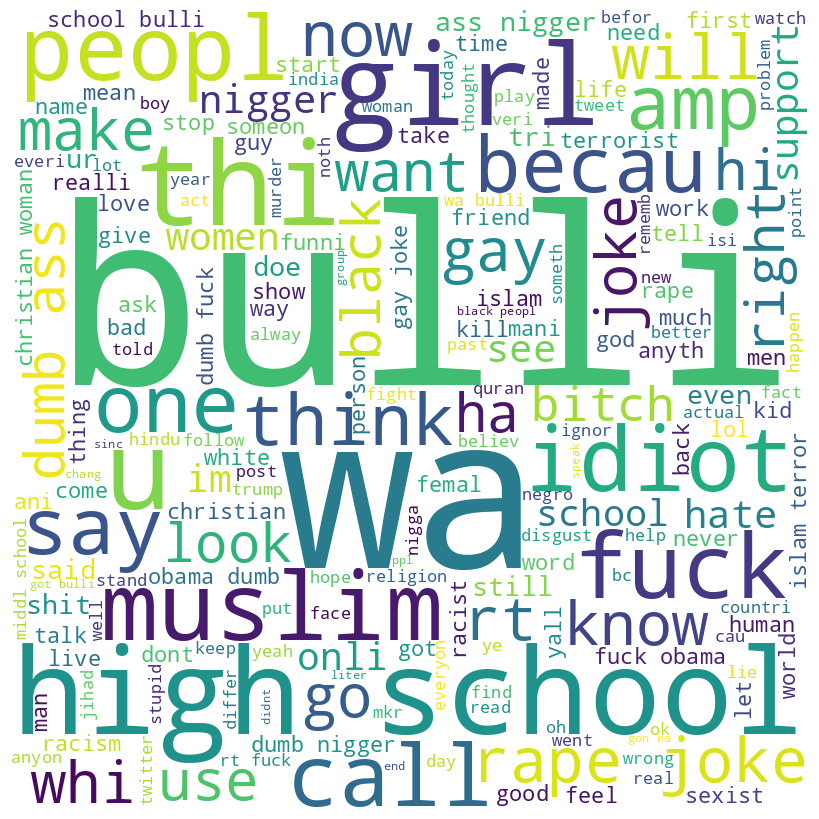

In [22]:
from wordcloud import WordCloud, STOPWORDS

# Function to generate word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

# Overall sentiment word cloud
overall_text = " ".join(text for text in df.text_clean)
print("Overall Sentiment Word Cloud:")
generate_wordcloud(overall_text)

# Individual sentiment word clouds
sentiments = {
    0: "not_cyberbullying",
    1: "cyberbullying"
}

for sentiment_code, sentiment_name in sentiments.items():
    sentiment_text = " ".join(text for text in df[df['sentiment'] == sentiment_code].text_clean)
    print(f"\nWord Cloud for {sentiment_name} :")
    generate_wordcloud(sentiment_text)



# Models and implementation

### Balancing the data using SMOTE

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [24]:
#SMOTE and Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features (X) and labels (y)
X_cv = df['text_clean']  
y_cv = df['sentiment']  

# Initialize CountVectorizer
count_vectorizer_cv = CountVectorizer()  

# Convert text data into numerical vectors using CountVectorizer
X_count_cv = count_vectorizer_cv.fit_transform(X_cv)  

# Initialize SMOTE
smote_cv = SMOTE(random_state=42)  

# Resample the data using SMOTE
X_resampled_cv, y_resampled_cv = smote_cv.fit_resample(X_count_cv, y_cv)  

# Split the resampled data into train and test sets
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_resampled_cv, y_resampled_cv, test_size=0.2, random_state=42)  


In [27]:
# Count the number of tweets for cyberbullying and not cyberbullying after resampling
cyberbullying_tweets_cv = sum(y_resampled_cv == 1)  # Assuming cyberbullying sentiment label is encoded as 1
not_cyberbullying_tweets_cv = sum(y_resampled_cv == 0)  # Assuming not cyberbullying sentiment label is encoded as 0

print("Number of tweets for cyberbullying:", cyberbullying_tweets_cv)
print("Number of tweets for not cyberbullying:", not_cyberbullying_tweets_cv)


Number of tweets for cyberbullying: 36598
Number of tweets for not cyberbullying: 36598


In [25]:
import joblib

In [26]:
joblib.dump(count_vectorizer_cv, 'count_vectorizer_cv.joblib')

['count_vectorizer_cv.joblib']

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7270
           1       0.93      0.87      0.90      7370

    accuracy                           0.90     14640
   macro avg       0.90      0.90      0.90     14640
weighted avg       0.90      0.90      0.90     14640

Accuracy Score for Random Forest Classifier: 0.9014
Precision Score for Random Forest Classifier: 0.9026788761683529
Recall Score for Random Forest Classifier: 0.9014344262295082
F1 Score for Random Forest Classifier: 0.9013788949612742
Confusion Matrix for Random Forest Classifier:


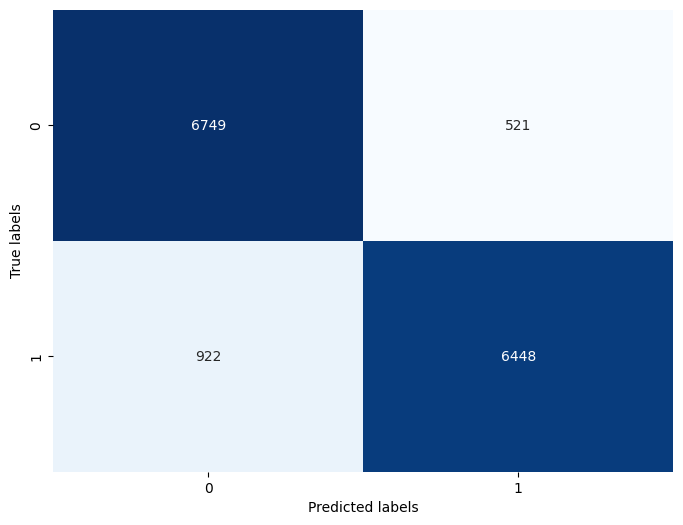

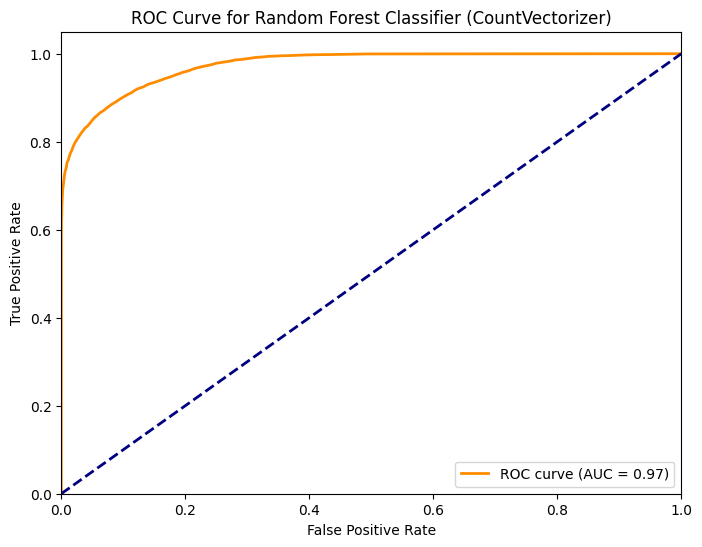

In [35]:
#CV and RF

# Train Random Forest classifier
rf_classifier_cv = RandomForestClassifier()
rf_classifier_cv.fit(X_train_cv, y_train_cv)

# Make predictions using Random Forest classifier
rf_predictions_cv = rf_classifier_cv.predict(X_test_cv)
# Calculate accuracy for Random Forest classifier
rf_accuracy_cv = accuracy_score(y_test_cv, rf_predictions_cv)

joblib.dump(rf_classifier_cv, 'rf_classifier_cv.joblib')

# Calculate precision, recall, and F1-score for Random Forest classifier
precision_rf = precision_score(y_test_cv, rf_predictions_cv, average='weighted')
recall_rf = recall_score(y_test_cv, rf_predictions_cv, average='weighted')
f1_rf = f1_score(y_test_cv, rf_predictions_cv, average='weighted')

# Generate classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test_cv, rf_predictions_cv))
print(f"Accuracy Score for Random Forest Classifier: {rf_accuracy_cv:.4f}")

print("Precision Score for Random Forest Classifier:", precision_rf)
print("Recall Score for Random Forest Classifier:", recall_rf)
print("F1 Score for Random Forest Classifier:", f1_rf)

# Generate confusion matrix for Random Forest classifier
conf_matrix_rf = confusion_matrix(y_test_cv, rf_predictions_cv)
print("Confusion Matrix for Random Forest Classifier:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Get predicted probabilities for each class
rf_probs_cv = rf_classifier_cv.predict_proba(X_test_cv)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_cv, rf_probs_cv[:, 1])  # Use probabilities for the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (CountVectorizer)')
plt.legend(loc='lower right')
plt.show()

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7270
           1       0.93      0.90      0.92      7370

    accuracy                           0.92     14640
   macro avg       0.92      0.92      0.92     14640
weighted avg       0.92      0.92      0.92     14640

Accuracy Score for SVM Classifier: 0.9162

Precision Score for SVM Classifier: 0.9168697610467742
Recall Score for SVM Classifier: 0.916188524590164
F1 Score for SVM Classifier: 0.9161667864884624
Confusion Matrix for SVM Classifier:


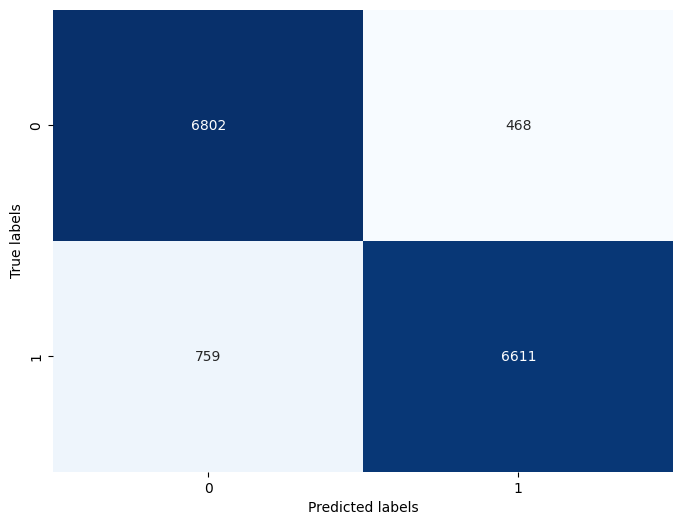

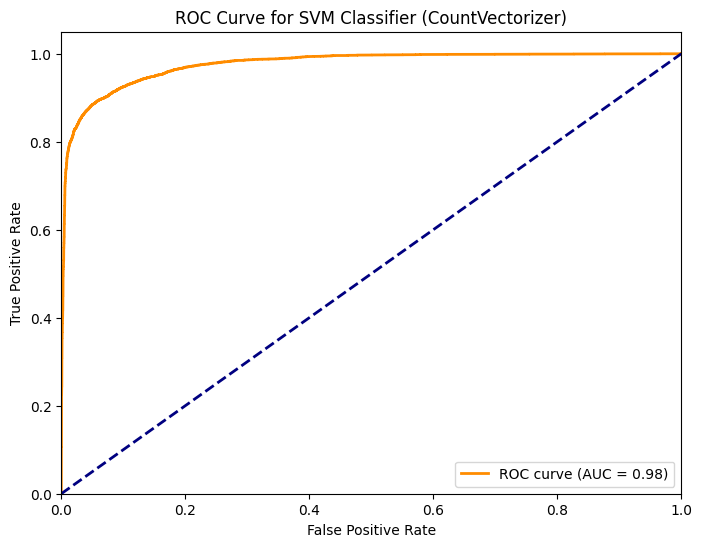

In [29]:
#CV AND SVM

# Train SVM classifier
svm_classifier_cv = SVC()
svm_classifier_cv.fit(X_train_cv, y_train_cv)

# Make predictions using SVM classifier
svm_predictions_cv = svm_classifier_cv.predict(X_test_cv)
# Calculate accuracy for SVM classifier
svm_accuracy_cv = accuracy_score(y_test_cv, svm_predictions_cv)

joblib.dump(svm_classifier_cv, 'svm_classifier_cv.joblib')

# Calculate precision, recall, and F1-score for SVM classifier
precision_svm = precision_score(y_test_cv, svm_predictions_cv, average='weighted')
recall_svm = recall_score(y_test_cv, svm_predictions_cv, average='weighted')
f1_svm = f1_score(y_test_cv, svm_predictions_cv, average='weighted')

print("SVM Classification Report:")
print(classification_report(y_test_cv, svm_predictions_cv))
print(f"Accuracy Score for SVM Classifier: {svm_accuracy_cv:.4f}\n")

print("Precision Score for SVM Classifier:", precision_svm)
print("Recall Score for SVM Classifier:", recall_svm)
print("F1 Score for SVM Classifier:", f1_svm)

# Generate confusion matrix for SVM classifier
conf_matrix_cv_svm = confusion_matrix(y_test_cv, svm_predictions_cv)
print("Confusion Matrix for SVM Classifier:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Get predicted probabilities for each class
svm_probs_cv = svm_classifier_cv.decision_function(X_test_cv)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_cv, svm_probs_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier (CountVectorizer)')
plt.legend(loc='lower right')
plt.show()


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      7270
           1       0.79      0.90      0.84      7370

    accuracy                           0.83     14640
   macro avg       0.84      0.83      0.83     14640
weighted avg       0.84      0.83      0.83     14640

Accuracy Score for Naive Bayes Classifier: 0.8310
Precision Score for Naive Bayes Classifier: 0.8366847036742341
Recall Score for Naive Bayes Classifier: 0.8310109289617487
F1 Score for Naive Bayes Classifier: 0.8302011482463786

Confusion Matrix for Naive Bayes Classifier and Count Vectorizer:


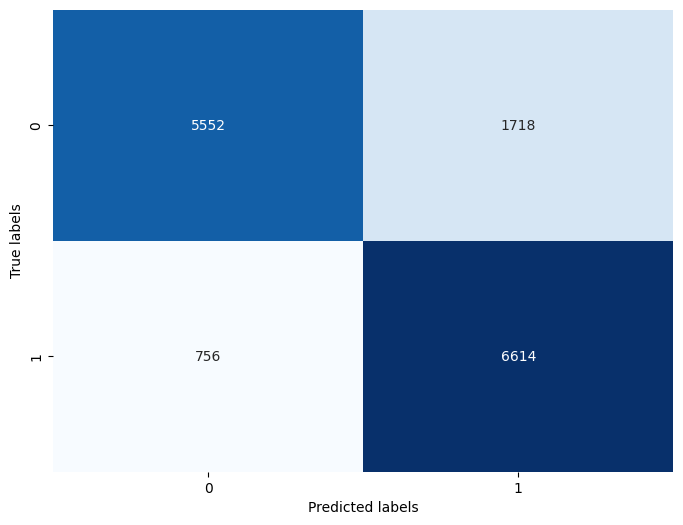

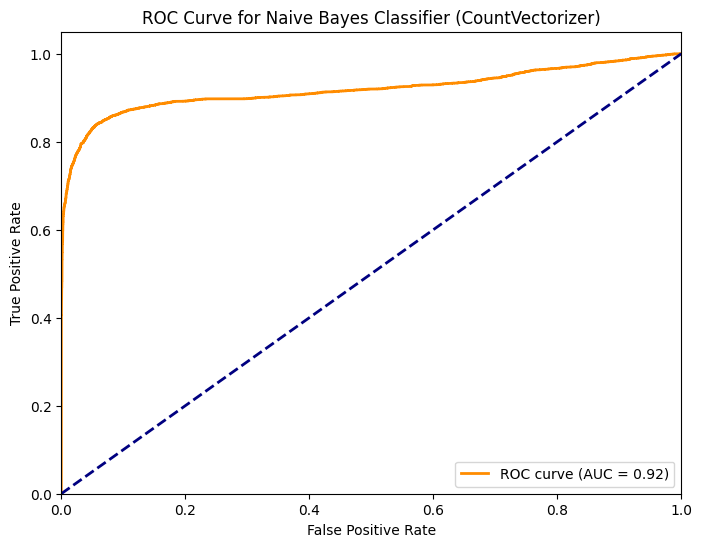

In [36]:
#CV and NB

# Train Naive Bayes classifier
nb_classifier_cv = MultinomialNB()
nb_classifier_cv.fit(X_train_cv, y_train_cv)

# Make predictions using Naive Bayes classifier
nb_predictions_cv = nb_classifier_cv.predict(X_test_cv)
# Calculate accuracy for Naive Bayes classifier
nb_accuracy_cv = accuracy_score(y_test_cv, nb_predictions_cv)

joblib.dump(nb_classifier_cv, 'nb_classifier_cv.joblib')

# Calculate precision, recall, and F1-score for Naive Bayes classifier
precision_nb = precision_score(y_test_cv, nb_predictions_cv, average='weighted')
recall_nb = recall_score(y_test_cv, nb_predictions_cv, average='weighted')
f1_nb = f1_score(y_test_cv, nb_predictions_cv, average='weighted')

print("Naive Bayes Classification Report:")
print(classification_report(y_test_cv, nb_predictions_cv))
print(f"Accuracy Score for Naive Bayes Classifier: {nb_accuracy_cv:.4f}")

print("Precision Score for Naive Bayes Classifier:", precision_nb)
print("Recall Score for Naive Bayes Classifier:", recall_nb)
print("F1 Score for Naive Bayes Classifier:", f1_nb)

# Generate confusion matrix for Naive Bayes classifier
conf_matrix_cv_nb = confusion_matrix(y_test_cv, nb_predictions_cv)
print("\nConfusion Matrix for Naive Bayes Classifier and Count Vectorizer:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Get predicted probabilities for each class
nb_probs_cv = nb_classifier_cv.predict_proba(X_test_cv)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_cv, nb_probs_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier (CountVectorizer)')
plt.legend(loc='lower right')
plt.show()


## SMOTE & TF-IDF 

In [27]:
#SMOTE TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features (X) and labels (y)
X_tfidf = df['text_clean']
y_tfidf = df['sentiment']

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text data into numerical vectors using TF-IDF vectorization
X_tfidf_vectors = tfidf_vectorizer.fit_transform(X_tfidf)

# Initialize SMOTE
smote_tfidf = SMOTE(random_state=42)

# Resample the data using SMOTE
X_resampled_tfidf, y_resampled_tfidf = smote_tfidf.fit_resample(X_tfidf_vectors, y_tfidf)

# Split the resampled data into train and test sets
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_resampled_tfidf, y_resampled_tfidf, test_size=0.2, random_state=42)


In [28]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7270
           1       0.97      0.88      0.92      7370

    accuracy                           0.92     14640
   macro avg       0.93      0.92      0.92     14640
weighted avg       0.93      0.92      0.92     14640

Accuracy Score for Random Forest Classifier: 0.9231
Precision Score for Random Forest Classifier: 0.926903328847879
Recall Score for Random Forest Classifier: 0.9230874316939891
F1 Score for Random Forest Classifier: 0.9229420257805973

Confusion Matrix for Random Forest Classifier:


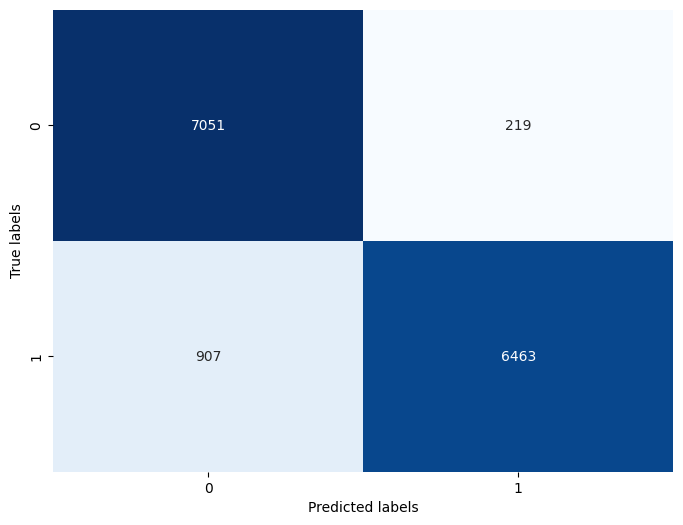

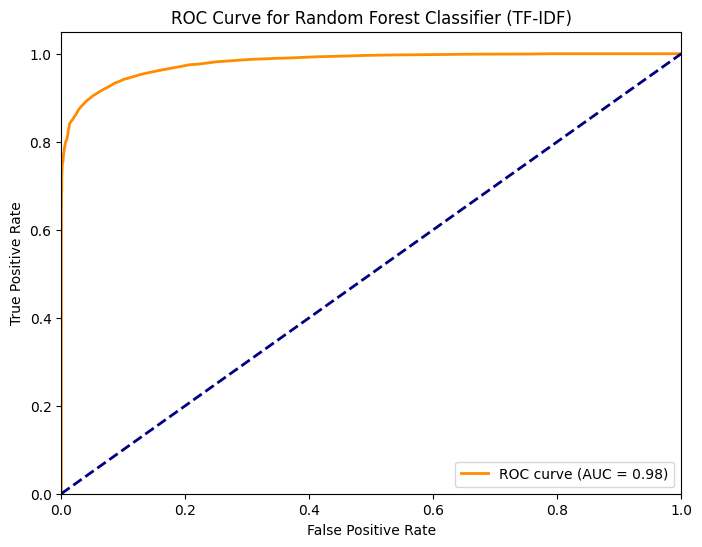

In [37]:
#TF-IDF & RF
# Train Random Forest classifier
rf_classifier_tfidf = RandomForestClassifier()
rf_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions using Random Forest classifier
rf_predictions_tfidf = rf_classifier_tfidf.predict(X_test_tfidf)
# Calculate accuracy for Random Forest classifier
rf_accuracy_tfidf = accuracy_score(y_test_tfidf, rf_predictions_tfidf)

joblib.dump(rf_classifier_tfidf, 'rf_classifier_tfidf.joblib')

# Calculate precision, recall, and F1-score for Random Forest classifier
precision_rf_tfidf = precision_score(y_test_tfidf, rf_predictions_tfidf, average='weighted')
recall_rf_tfidf = recall_score(y_test_tfidf, rf_predictions_tfidf, average='weighted')
f1_rf_tfidf = f1_score(y_test_tfidf, rf_predictions_tfidf, average='weighted')

# Generate classification report
print("Random Forest Classification Report:")
print(classification_report(y_test_tfidf, rf_predictions_tfidf))
print(f"Accuracy Score for Random Forest Classifier: {rf_accuracy_tfidf:.4f}")
print("Precision Score for Random Forest Classifier:", precision_rf_tfidf)
print("Recall Score for Random Forest Classifier:", recall_rf_tfidf)
print("F1 Score for Random Forest Classifier:", f1_rf_tfidf)

# Generate confusion matrix for Random Forest classifier
conf_matrix_rf_tfidf = confusion_matrix(y_test_tfidf, rf_predictions_tfidf)
print("\nConfusion Matrix for Random Forest Classifier:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Get predicted probabilities for each class
rf_probs_tfidf = rf_classifier_tfidf.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_tfidf, rf_probs_tfidf[:, 1])  # Use probabilities for the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (TF-IDF)')
plt.legend(loc='lower right')
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7270
           1       0.94      0.92      0.93      7370

    accuracy                           0.93     14640
   macro avg       0.93      0.93      0.93     14640
weighted avg       0.93      0.93      0.93     14640

Accuracy Score for SVM Classifier: 0.9298
Precision Score for SVM Classifier: 0.9299190986950254
Recall Score for SVM Classifier: 0.9298497267759562
F1 Score for SVM Classifier: 0.9298500472037285

Confusion Matrix for SVM Classifier:


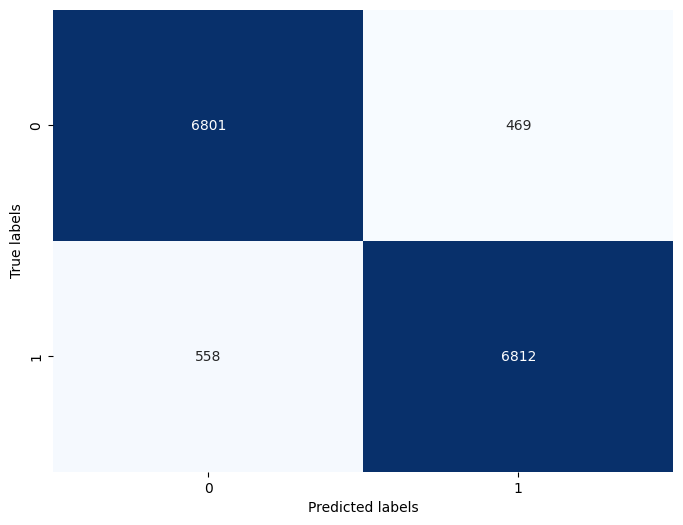

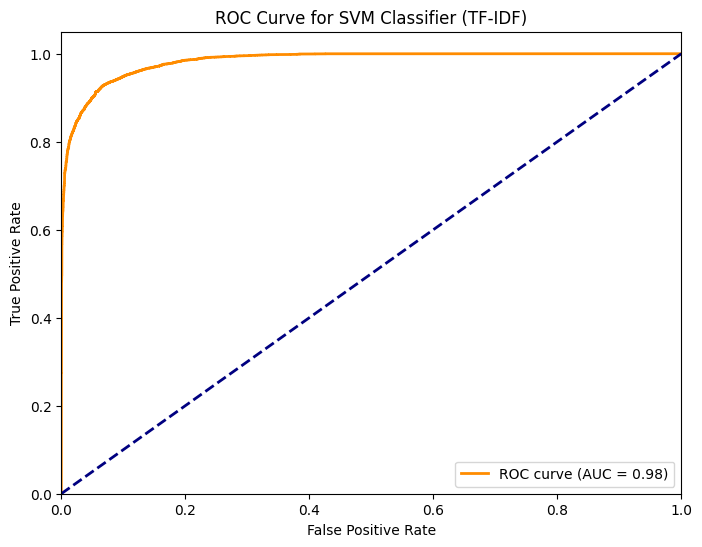

In [32]:
#TF-IDF & SVM
# Train SVM classifier
svm_classifier_tfidf = SVC()
svm_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predictions using SVM classifier
svm_predictions_tfidf = svm_classifier_tfidf.predict(X_test_tfidf)
# Calculate accuracy for SVM classifier
svm_accuracy_tfidf = accuracy_score(y_test_tfidf, svm_predictions_tfidf)

joblib.dump(svm_classifier_tfidf, 'svm_classifier_tfidf.joblib')

# Calculate precision, recall, and F1-score for SVM classifier
precision_svm_tfidf = precision_score(y_test_tfidf, svm_predictions_tfidf, average='weighted')
recall_svm_tfidf = recall_score(y_test_tfidf, svm_predictions_tfidf, average='weighted')
f1_svm_tfidf = f1_score(y_test_tfidf, svm_predictions_tfidf, average='weighted')

print("SVM Classification Report:")
print(classification_report(y_test_tfidf, svm_predictions_tfidf))
print(f"Accuracy Score for SVM Classifier: {svm_accuracy_tfidf:.4f}")
print("Precision Score for SVM Classifier:", precision_svm_tfidf)
print("Recall Score for SVM Classifier:", recall_svm_tfidf)
print("F1 Score for SVM Classifier:", f1_svm_tfidf)

# Generate confusion matrix for SVM classifier
conf_matrix_svm_tfidf = confusion_matrix(y_test_tfidf, svm_predictions_tfidf)
print("\nConfusion Matrix for SVM Classifier:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Get predicted probabilities for each class
svm_probs_tfidf = svm_classifier_tfidf.decision_function(X_test_tfidf)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_tfidf, svm_probs_tfidf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier (TF-IDF)')
plt.legend(loc='lower right')
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score

# Define the SVM classifier
svm_classifier_tfidf = SVC()

# Perform cross-validation
cv_scores_tfidf = cross_val_score(svm_classifier_tfidf, X_train_tfidf, y_train_tfidf, cv=15)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_tfidf)

# Calculate and print the mean accuracy score
mean_cv_score_tfidf = cv_scores_tfidf.mean()
print("Mean cross-validation score:", mean_cv_score_tfidf)


Cross-validation scores: [0.92418033 0.92597336 0.92648566 0.9213627  0.92085041 0.93084016
 0.92546107 0.93186475 0.92597336 0.93160861 0.92366803 0.91878043
 0.92339226 0.9318473  0.92159877]
Mean cross-validation score: 0.9255924798284632


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      7270
           1       0.81      0.90      0.86      7370

    accuracy                           0.85     14640
   macro avg       0.85      0.85      0.85     14640
weighted avg       0.85      0.85      0.85     14640

Accuracy Score for Naive Bayes Classifier: 0.8485
Precision Score for Naive Bayes Classifier: 0.8526867924370832
Recall Score for Naive Bayes Classifier: 0.8484972677595628
F1 Score for Naive Bayes Classifier: 0.8479766615454507

Confusion Matrix for Naive Bayes Classifier:


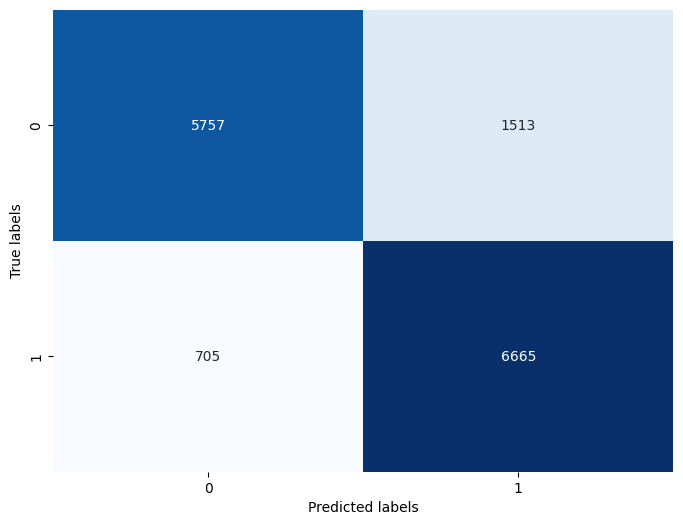

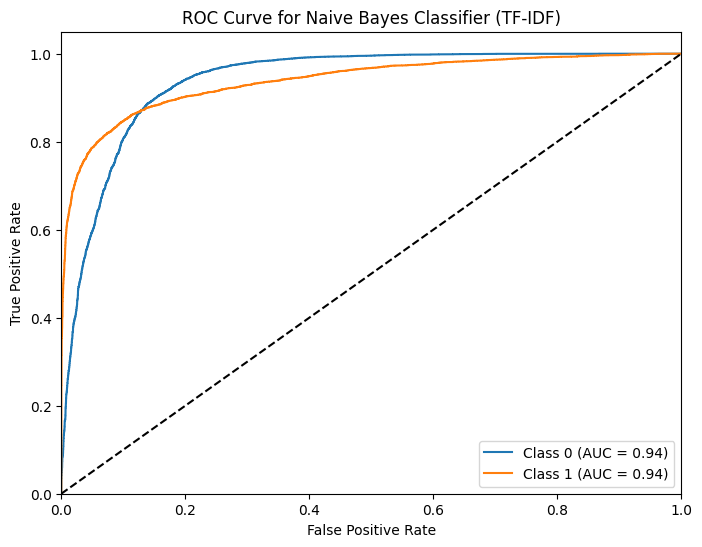

In [38]:
#TF-IDF & NB
# Train Naive Bayes classifier
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predictions using Naive Bayes classifier
nb_predictions_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)
# Calculate accuracy for Naive Bayes classifier
nb_accuracy_tfidf = accuracy_score(y_test_tfidf, nb_predictions_tfidf)

joblib.dump(nb_classifier_tfidf, 'nb_classifier_tfidf.joblib')

# Calculate precision, recall, and F1-score for Naive Bayes classifier
precision_nb_tfidf = precision_score(y_test_tfidf, nb_predictions_tfidf, average='weighted')
recall_nb_tfidf = recall_score(y_test_tfidf, nb_predictions_tfidf, average='weighted')
f1_nb_tfidf = f1_score(y_test_tfidf, nb_predictions_tfidf, average='weighted')

print("Naive Bayes Classification Report:")
print(classification_report(y_test_tfidf, nb_predictions_tfidf))
print(f"Accuracy Score for Naive Bayes Classifier: {nb_accuracy_tfidf:.4f}")
print("Precision Score for Naive Bayes Classifier:", precision_nb_tfidf)
print("Recall Score for Naive Bayes Classifier:", recall_nb_tfidf)
print("F1 Score for Naive Bayes Classifier:", f1_nb_tfidf)

# Generate confusion matrix for Naive Bayes classifier
conf_matrix_nb_tfidf = confusion_matrix(y_test_tfidf, nb_predictions_tfidf)
print("\nConfusion Matrix for Naive Bayes Classifier:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Get predicted probabilities for each class
nb_probs_tfidf = nb_classifier_tfidf.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(nb_classifier_tfidf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_tfidf == nb_classifier_tfidf.classes_[i], nb_probs_tfidf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(nb_classifier_tfidf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {nb_classifier_tfidf.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier (TF-IDF)')
plt.legend(loc='lower right')
plt.show()


## SMOTE & BoW

In [39]:
#SMOTE and BoW
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features (X) and labels (y)
X = df['text_clean']
y = df['sentiment']

# Initialize CountVectorizer with n-grams up to trigrams
count_vectorizer_ngrams = CountVectorizer(ngram_range=(1, 3))  # This specifies unigrams, bigrams, and trigrams

# Convert text data into numerical vectors using CountVectorizer with n-grams
X_count_ngrams = count_vectorizer_ngrams.fit_transform(X)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_resampled_ngrams, y_resampled_ngrams = smote.fit_resample(X_count_ngrams, y)

# Split the resampled data into train and test sets
X_train_ngrams, X_test_ngrams, y_train_ngrams, y_test_ngrams = train_test_split(X_resampled_ngrams, y_resampled_ngrams, test_size=0.2, random_state=42)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      7270
           1       0.94      0.84      0.89      7370

    accuracy                           0.89     14640
   macro avg       0.90      0.89      0.89     14640
weighted avg       0.90      0.89      0.89     14640

Accuracy Score for Random Forest Classifier: 0.8924863387978142
Precision Score for Random Forest Classifier: 0.8969497118233968
Recall Score for Random Forest Classifier: 0.8924863387978142
F1 Score for Random Forest Classifier: 0.8922270059182499

Confusion Matrix for Random Forest Classifier:


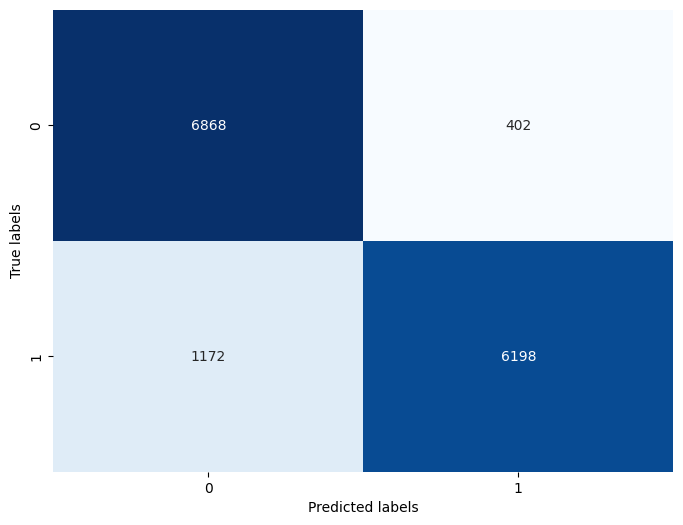

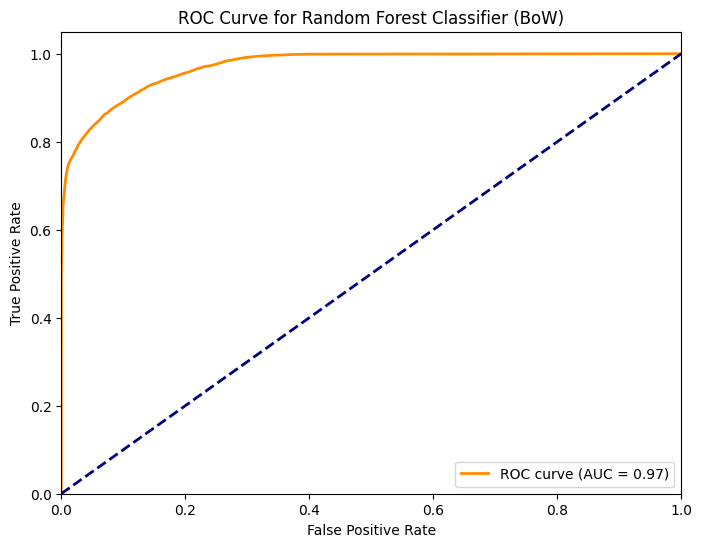

In [40]:
#BoW & RF
# Train Random Forest classifier
rf_classifier_bow = RandomForestClassifier()
rf_classifier_bow.fit(X_train_ngrams, y_train_ngrams)

# Make predictions using Random Forest classifier
y_pred_rf = rf_classifier_bow.predict(X_test_ngrams)

# Calculate accuracy for Random Forest classifier
rf_accuracy = accuracy_score(y_test_ngrams, y_pred_rf)

joblib.dump(rf_classifier_bow, 'rf_classifier_bow.joblib')

# Calculate precision, recall, and F1-score for Random Forest classifier
precision_rf = precision_score(y_test_ngrams, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_ngrams, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_ngrams, y_pred_rf, average='weighted')

# Generate classification report for Random Forest classifier
print("Random Forest Classification Report:")
print(classification_report(y_test_ngrams, y_pred_rf))
print("Accuracy Score for Random Forest Classifier:", rf_accuracy)
print("Precision Score for Random Forest Classifier:", precision_rf)
print("Recall Score for Random Forest Classifier:", recall_rf)
print("F1 Score for Random Forest Classifier:", f1_rf)

# Generate confusion matrix for Random Forest classifier
conf_matrix_bow_rf = confusion_matrix(y_test_ngrams, y_pred_rf)
print("\nConfusion Matrix for Random Forest Classifier:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Calculate predicted probabilities for each class
rf_probs = rf_classifier_bow.predict_proba(X_test_ngrams)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test_ngrams, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (BoW)')
plt.legend(loc='lower right')
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7270
           1       0.91      0.91      0.91      7370

    accuracy                           0.91     14640
   macro avg       0.91      0.91      0.91     14640
weighted avg       0.91      0.91      0.91     14640

Accuracy Score for SVM Classifier: 0.9093579234972677
Precision Score for SVM Classifier: 0.9093728423373346
Recall Score for SVM Classifier: 0.9093579234972677
F1 Score for SVM Classifier: 0.9093589296170186

Confusion Matrix for SVM Classifier:


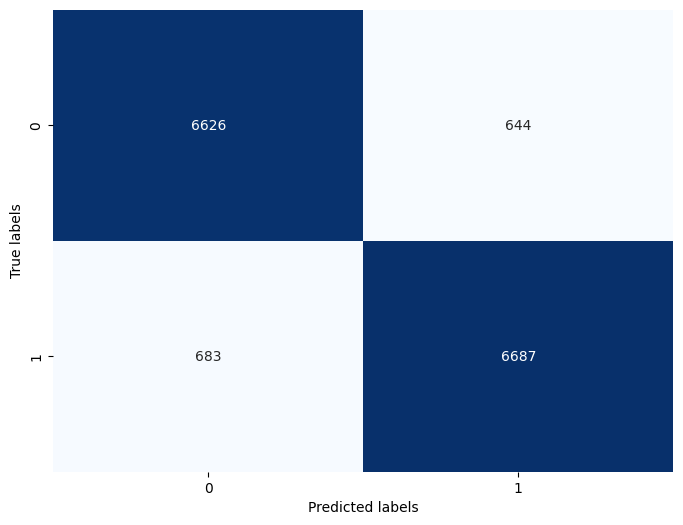

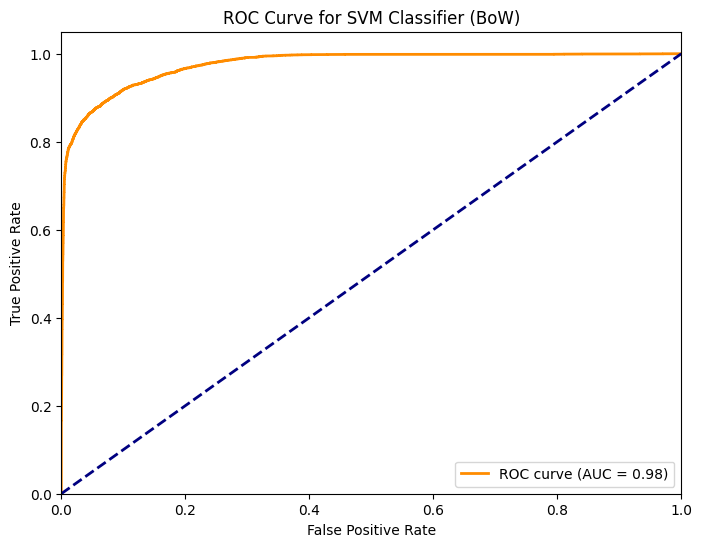

In [41]:
#BoW & SVM

# Train SVM classifier
svm_classifier_bow = SVC()
svm_classifier_bow.fit(X_train_ngrams, y_train_ngrams)

# Make predictions using SVM classifier
y_pred_svm = svm_classifier_bow.predict(X_test_ngrams)

# Calculate accuracy for SVM classifier
svm_accuracy = accuracy_score(y_test_ngrams, y_pred_svm)

joblib.dump(svm_classifier_bow, 'svm_classifier_bow.joblib')

# Calculate precision, recall, and F1-score for SVM classifier
precision_svm = precision_score(y_test_ngrams, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test_ngrams, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test_ngrams, y_pred_svm, average='weighted')

# Generate classification report for SVM classifier
print("SVM Classification Report:")
print(classification_report(y_test_ngrams, y_pred_svm))
print("Accuracy Score for SVM Classifier:", svm_accuracy)

print("Precision Score for SVM Classifier:", precision_svm)
print("Recall Score for SVM Classifier:", recall_svm)
print("F1 Score for SVM Classifier:", f1_svm)

# Generate confusion matrix for SVM classifier
conf_matrix_bow_svm = confusion_matrix(y_test_ngrams, y_pred_svm)
print("\nConfusion Matrix for SVM Classifier:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Calculate predicted probabilities for each class
svm_probs = svm_classifier_bow.decision_function(X_test_ngrams)

# Compute ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test_ngrams, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier (BoW)')
plt.legend(loc='lower right')
plt.show()


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      7270
           1       0.70      0.92      0.80      7370

    accuracy                           0.77     14640
   macro avg       0.79      0.76      0.76     14640
weighted avg       0.79      0.77      0.76     14640

Accuracy Score for Naive Bayes Classifier: 0.7652322404371584
Precision Score for Naive Bayes Classifier: 0.7922467573177625
Recall Score for Naive Bayes Classifier: 0.7652322404371584
F1 Score for Naive Bayes Classifier: 0.7593350023445067

Confusion Matrix for Naive Bayes Classifier:


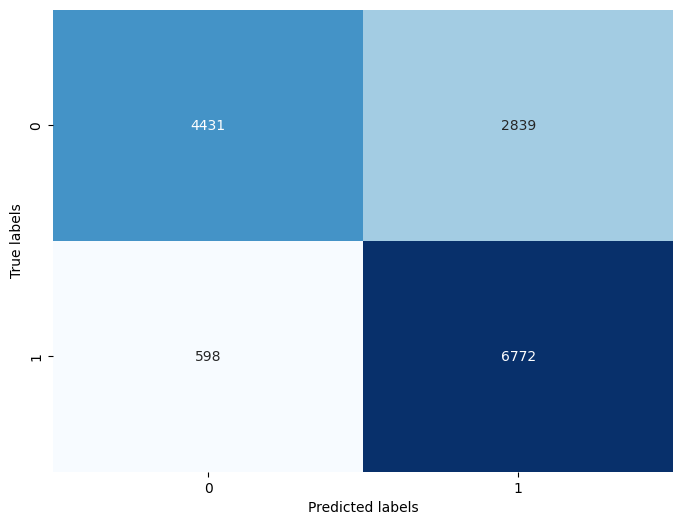

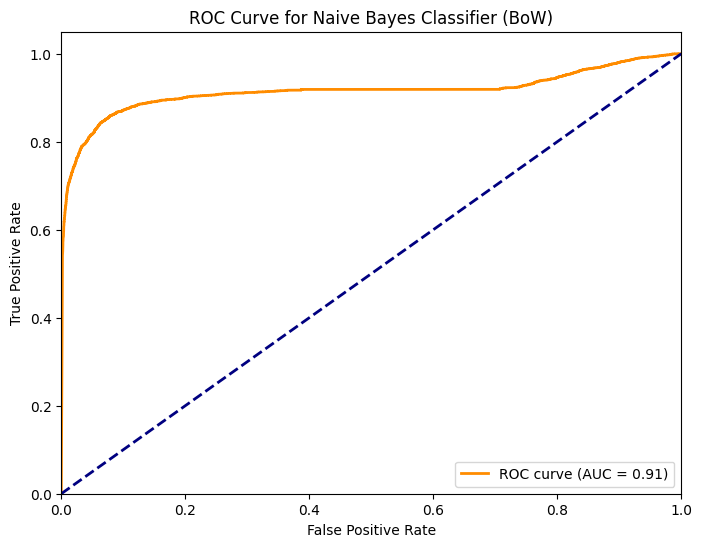

In [42]:
#BoW & NB

# Train Naive Bayes classifier
nb_classifier_bow = MultinomialNB()
nb_classifier_bow.fit(X_train_ngrams, y_train_ngrams)

# Make predictions using Naive Bayes classifier
y_pred_nb = nb_classifier_bow.predict(X_test_ngrams)

# Calculate accuracy for Naive Bayes classifier
nb_accuracy = accuracy_score(y_test_ngrams, y_pred_nb)

joblib.dump(nb_classifier_bow, 'nb_classifier_bow.joblib')

# Calculate precision, recall, and F1-score for Naive Bayes classifier
precision_nb = precision_score(y_test_ngrams, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test_ngrams, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test_ngrams, y_pred_nb, average='weighted')

# Generate classification report for Naive Bayes classifier
print("Naive Bayes Classification Report:")
print(classification_report(y_test_ngrams, y_pred_nb))
print("Accuracy Score for Naive Bayes Classifier:", nb_accuracy)
print("Precision Score for Naive Bayes Classifier:", precision_nb)
print("Recall Score for Naive Bayes Classifier:", recall_nb)
print("F1 Score for Naive Bayes Classifier:", f1_nb)

# Generate confusion matrix for Naive Bayes classifier
conf_matrix_nb = confusion_matrix(y_test_ngrams, y_pred_nb)
print("\nConfusion Matrix for Naive Bayes Classifier:")
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Calculate predicted probabilities for each class
nb_probs = nb_classifier_bow.predict_proba(X_test_ngrams)[:, 1]  # Considering only the positive class

# Compute ROC curve and AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test_ngrams, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier (BoW)')
plt.legend(loc='lower right')
plt.show()